In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv("Group 2.csv")
df.head()



,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,6167,3154-CFSZG,Male,0,Yes,Yes,47,Yes,No,Fiber optic,...,Yes,No,No,Yes,Month-to-month,No,Electronic check,90.05,4137.2,No
1,1527,0640-YJTPY,Male,0,Yes,Yes,72,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),21.00,1493.75,No
2,2397,3722-WPXTK,Male,0,No,No,1,Yes,No,Fiber optic,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,88.35,88.35,Yes
3,2241,2908-WGAXL,Female,0,Yes,Yes,56,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),24.95,1468.9,No
4,5194,1902-XBTFB,Male,0,No,Yes,22,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,89.40,2001.5,Yes


In [7]:
# EDA 
df.shape


(5001, 22)

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5001 non-null   int64  
 1   customerID        5001 non-null   object 
 2   gender            5001 non-null   object 
 3   SeniorCitizen     5001 non-null   int64  
 4   Partner           5001 non-null   object 
 5   Dependents        5001 non-null   object 
 6   tenure            5001 non-null   int64  
 7   PhoneService      5001 non-null   object 
 8   MultipleLines     5001 non-null   object 
 9   InternetService   5001 non-null   object 
 10  OnlineSecurity    5001 non-null   object 
 11  OnlineBackup      5001 non-null   object 
 12  DeviceProtection  5001 non-null   object 
 13  TechSupport       5001 non-null   object 
 14  StreamingTV       5001 non-null   object 
 15  StreamingMovies   5001 non-null   object 
 16  Contract          5001 non-null   object 


In [10]:

df.describe()


,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges
count,5001.000000,5001.000000,5001.000000,5001.000000
mean,3510.909418,0.158368,32.457109,64.933173
std,2029.165195,0.365123,24.627209,30.123258
min,1.000000,0.000000,0.000000,18.550000
25%,1751.000000,0.000000,9.000000,35.500000
50%,3487.000000,0.000000,29.000000,70.600000
75%,5261.000000,0.000000,56.000000,89.900000
max,7042.000000,1.000000,72.000000,118.750000


75% tenure is less than 56 months 
Avergate Monthly Charges are 64$ , Max Charges are 118

In [12]:
df.nunique()

Unnamed: 0          5001
customerID          5001
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1431
TotalCharges        4710
Churn                  2
dtype: int64

In [13]:
df.head()


,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,6167,3154-CFSZG,Male,0,Yes,Yes,47,Yes,No,Fiber optic,...,Yes,No,No,Yes,Month-to-month,No,Electronic check,90.05,4137.2,No
1,1527,0640-YJTPY,Male,0,Yes,Yes,72,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),21.00,1493.75,No
2,2397,3722-WPXTK,Male,0,No,No,1,Yes,No,Fiber optic,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,88.35,88.35,Yes
3,2241,2908-WGAXL,Female,0,Yes,Yes,56,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),24.95,1468.9,No
4,5194,1902-XBTFB,Male,0,No,Yes,22,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,89.40,2001.5,Yes


<Figure size 6000x3600 with 0 Axes>

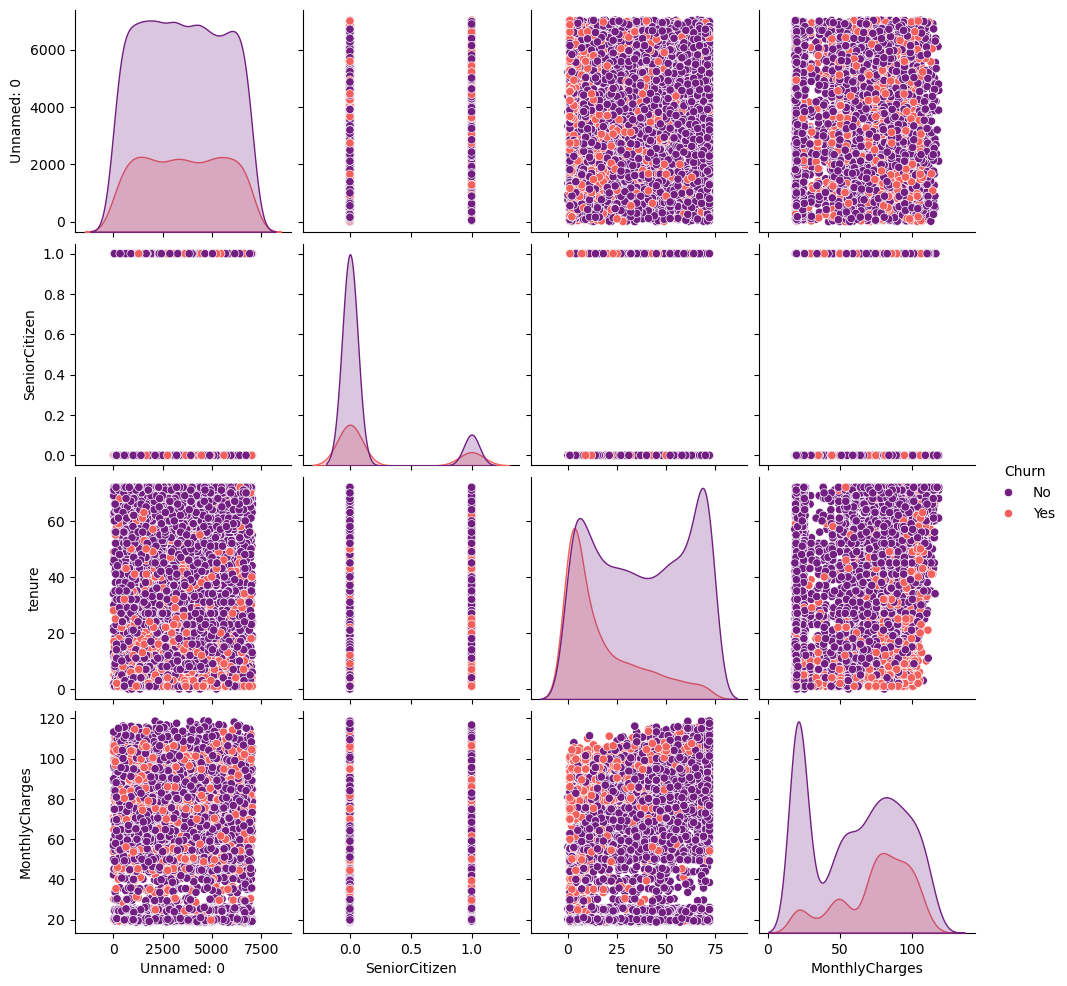

In [17]:
# TODO this needs to be changed , we need bar plot and churn on top of it 
plt.figure(dpi=300, figsize=(20,12))
sns.pairplot(df,hue="Churn",palette="magma")

plt.show()

Churn is high when Monthly Charges are high.
Churn is high at starting tenure and churn is low as tenure increases.


In [19]:
df['Churn'].value_counts()

Churn
No     3693
Yes    1308
Name: count, dtype: int64

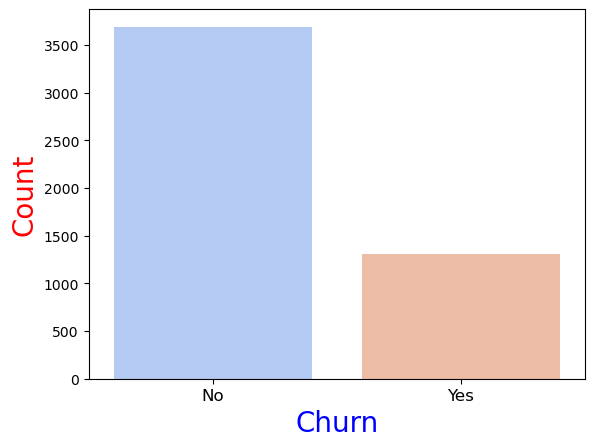

In [21]:
sns.countplot(x= "Churn", data= df,palette="coolwarm")

plt.xticks(fontsize = 12)
plt.xlabel("Churn", fontsize = 20, c= "b")
plt.ylabel("Count", fontsize = 20, c= "r")

plt.show()


75% churn as compared to 25% no churn. This in reality is not ture and may be underfitting data 


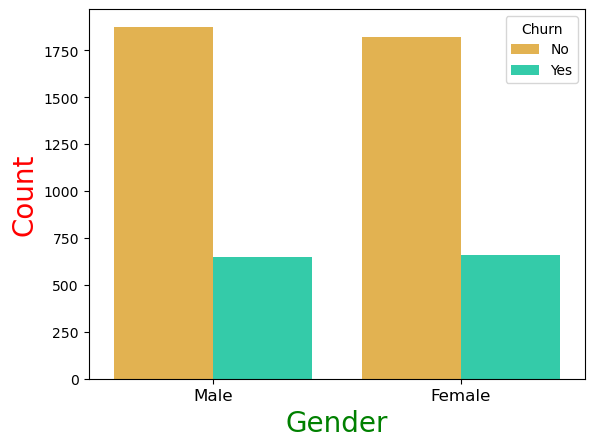

In [22]:
sns.countplot(x= "gender", data= df, hue = "Churn", palette= "turbo_r")


plt.xticks(fontsize = 12)
plt.xlabel("Gender", fontsize = 20, c= "g")
plt.ylabel("Count", fontsize = 20, c= "r")

plt.show()

Churn/NoChurn in male and female are approximately same 



In [ ]:
#TODO service plotting needs to be done 

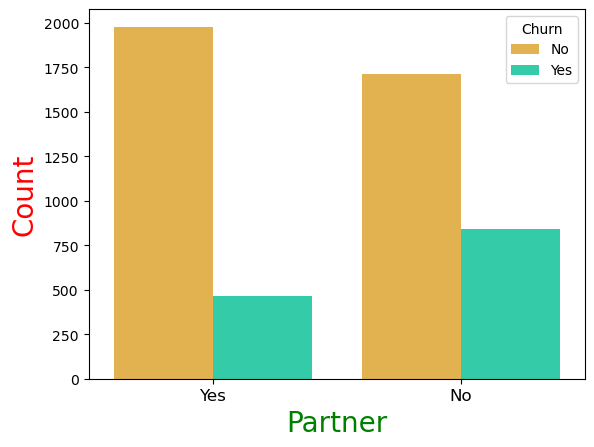

In [23]:
sns.countplot(x="Partner",hue="Churn",palette="turbo_r",data=df)

plt.xticks(fontsize = 12)
plt.xlabel("Partner", fontsize = 20, c= "g")
plt.ylabel("Count", fontsize = 20, c= "r")

plt.show()


People with partners are less likely to churn as compared people without any partner .



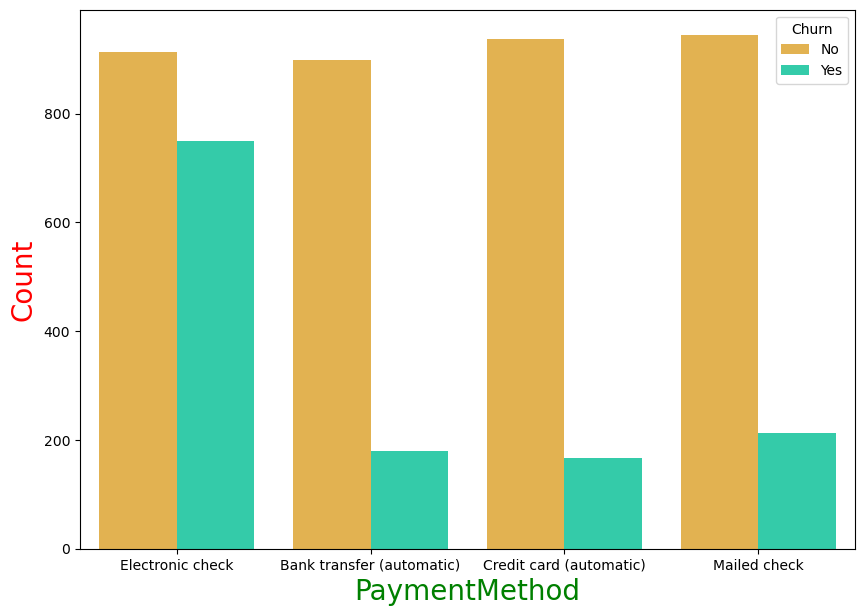

In [24]:
plt.figure(figsize= (10, 7))
sns.countplot(x="PaymentMethod",hue="Churn",palette="turbo_r",data=df)

plt.xticks(fontsize = 10)
plt.xlabel("PaymentMethod", fontsize = 20, c= "g")
plt.ylabel("Count", fontsize = 20, c= "r")

plt.show()


In Electronic check payment have high churn as compared to other churns




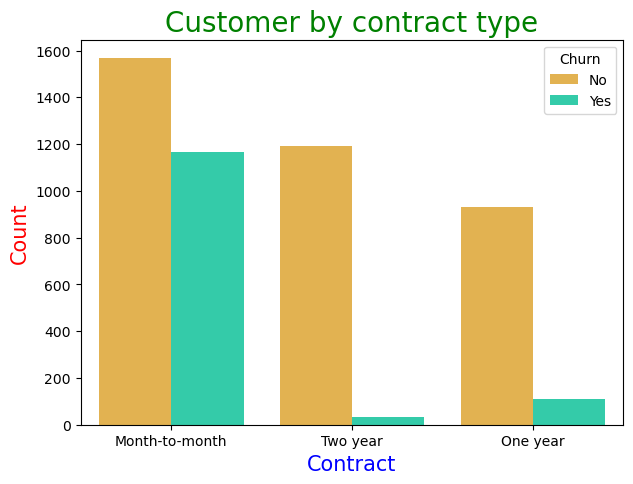

In [25]:
plt.figure(figsize=(7,5))
sns.countplot(x= "Contract", data= df ,palette="turbo_r", hue="Churn")

plt.xlabel("Contract", fontsize= 15, c = "b")
plt.ylabel("Count", fontsize= 15, c = "r")
plt.title("Customer by contract type", fontsize = 20, c= "g")
plt.show()

Month to Month contract has high churn


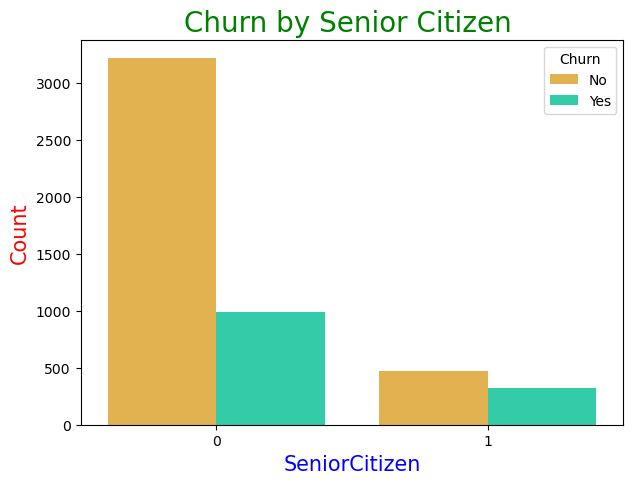

In [26]:
plt.figure(figsize=(7,5))
sns.countplot(x= "SeniorCitizen", data= df ,palette="turbo_r", hue="Churn")

plt.xlabel("SeniorCitizen", fontsize= 15, c = "b")
plt.ylabel("Count", fontsize= 15, c = "r")
plt.title("Churn by Senior Citizen ", fontsize = 20, c= "g")
plt.show()


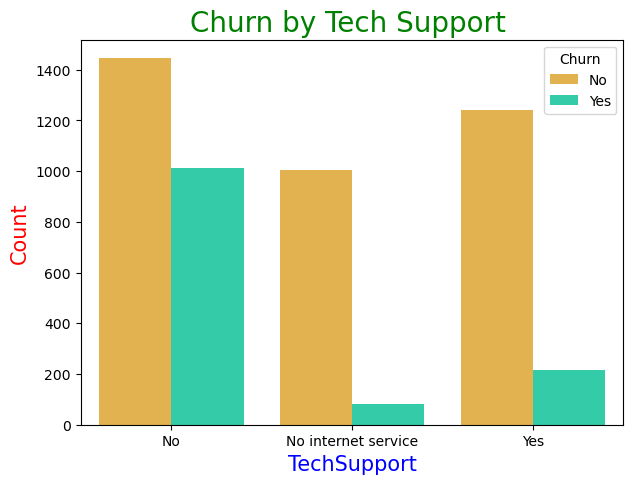

In [27]:
plt.figure(figsize=(7,5))
sns.countplot(x= "TechSupport", data= df ,palette="turbo_r", hue="Churn")

plt.xlabel("TechSupport", fontsize= 15, c = "b")
plt.ylabel("Count", fontsize= 15, c = "r")
plt.title("Churn by Tech Support ", fontsize = 20, c= "g")
plt.show()

No Tech support category has high Churn and No Internet service has low churn



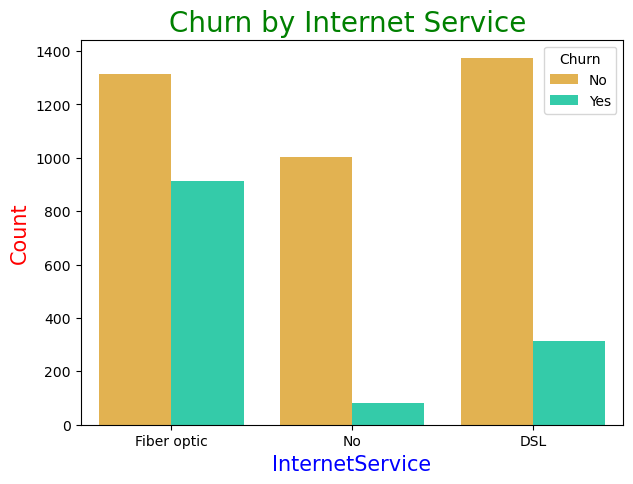

In [28]:
plt.figure(figsize=(7,5))
sns.countplot(x= "InternetService", data= df ,palette="turbo_r", hue="Churn")

plt.xlabel("InternetService", fontsize= 15, c = "b")
plt.ylabel("Count", fontsize= 15, c = "r")
plt.title("Churn by Internet Service ", fontsize = 20, c= "g")
plt.show()

        DSL has high churn and No internet service has low churn


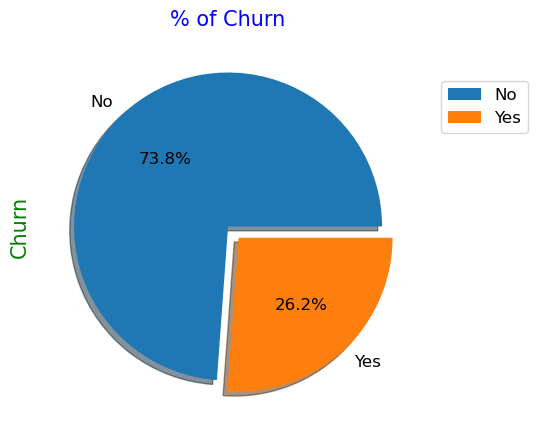

Churn
No     3693
Yes    1308
Name: count, dtype: int64

In [29]:
ax = (df['Churn'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12, explode = (0, 0.1), shadow=True )                                                                           

ax.set_ylabel('Churn',fontsize = 15, c = "g")
ax.set_title('% of Churn', fontsize = 15, c= "b")
plt.legend(loc='upper right', bbox_to_anchor =(1.3,0.9), fontsize=12)
plt.show()

df.Churn.value_counts()

Here we can see Churn is 26.2% and No Churn is 73.8%. Data is imbalance.

Data Cleaning



In [31]:
df.TotalCharges= pd.to_numeric(df.TotalCharges, errors="coerce")
df.isnull().sum()


Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        7
Churn               0
dtype: int64

In [32]:
df.loc[df['TotalCharges'].isnull()== True]


,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
260,3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
781,3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
1303,1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3026,5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
3346,4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
3637,753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
4257,936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No


In Total Charges columns 7 NaN values Present the values are having Churn to NO. 
So, We will drop that values for model building and 



In [33]:
df.dropna(axis =0, inplace=True)


In [34]:
df.isnull().sum()

Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

One Hot Encoding


In [36]:
#TODO Validate this 
dummies=(["gender","SeniorCitizen","Partner","Dependents","PhoneService","MultipleLines","InternetService",
          "OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies",
          "Contract","PaperlessBilling","PaymentMethod"])

# One Hot Encoding 
df_new = pd.get_dummies(df, columns=dummies, drop_first= True )
df_new.head()

,Unnamed: 0,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,6167,3154-CFSZG,47,90.05,4137.20,No,True,False,True,True,...,False,False,False,True,False,False,False,False,True,False
1,1527,0640-YJTPY,72,21.00,1493.75,No,True,False,True,True,...,True,False,True,False,False,True,False,False,False,False
2,2397,3722-WPXTK,1,88.35,88.35,Yes,True,False,False,False,...,False,True,False,True,False,False,True,False,True,False
3,2241,2908-WGAXL,56,24.95,1468.90,No,False,False,True,True,...,True,False,True,False,False,True,True,True,False,False
4,5194,1902-XBTFB,22,89.40,2001.50,Yes,True,False,False,True,...,False,True,False,False,False,False,True,False,True,False


In [37]:
df_new.dtypes


Unnamed: 0                                 int64
customerID                                object
tenure                                     int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                     object
gender_Male                                 bool
SeniorCitizen_1                             bool
Partner_Yes                                 bool
Dependents_Yes                              bool
PhoneService_Yes                            bool
MultipleLines_No phone service              bool
MultipleLines_Yes                           bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
OnlineSecurity_No internet service          bool
OnlineSecurity_Yes                          bool
OnlineBackup_No internet service            bool
OnlineBackup_Yes                            bool
DeviceProtection_No internet service        bool
DeviceProtection_Yes

In [39]:
df_new= df_new.drop(["customerID"], axis = 1)


KeyError: "['customerID'] not found in axis"

In [40]:
df_new.head()
    

,Unnamed: 0,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,6167,47,90.05,4137.20,No,True,False,True,True,True,...,False,False,False,True,False,False,False,False,True,False
1,1527,72,21.00,1493.75,No,True,False,True,True,True,...,True,False,True,False,False,True,False,False,False,False
2,2397,1,88.35,88.35,Yes,True,False,False,False,True,...,False,True,False,True,False,False,True,False,True,False
3,2241,56,24.95,1468.90,No,False,False,True,True,True,...,True,False,True,False,False,True,True,True,False,False
4,5194,22,89.40,2001.50,Yes,True,False,False,True,True,...,False,True,False,False,False,False,True,False,True,False


Converting Target Variable into Binary values Yes = 1, No = 0


In [41]:
df_new["Churn"]=np.where(df_new.Churn=="Yes",1,0)


In [42]:
df_new.Churn.head()


0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

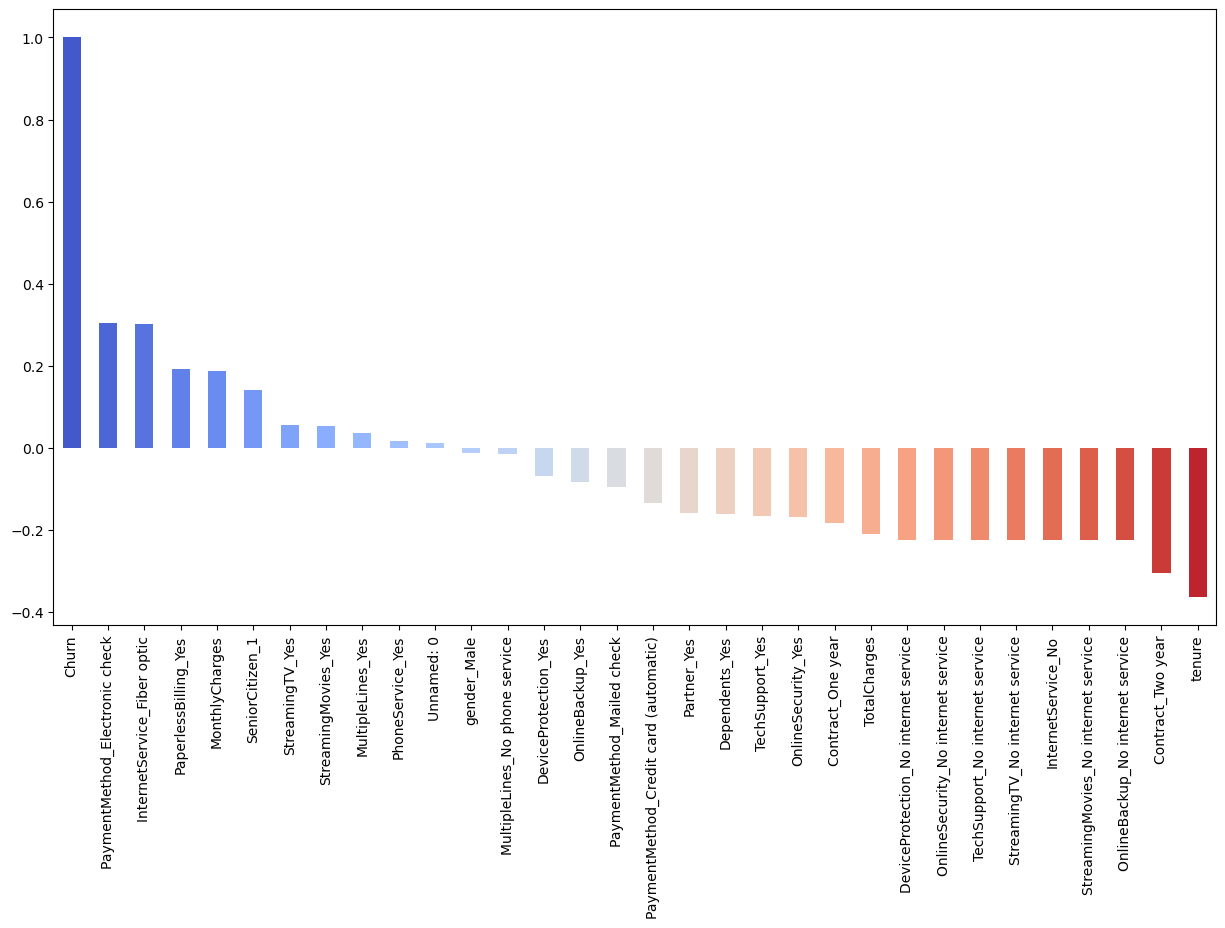

In [69]:
plt.figure(figsize=(15,8))
custom_colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6']

df_new.corr()['Churn'].sort_values(ascending = False).plot(kind='bar',color=custom_colors)

plt.show()


Model Building
Spliting up our data into an X array that contains the features to train and a y array with the target variable.



In [44]:
X = df_new.drop("Churn", axis =1)
X.shape


(4994, 31)

In [45]:
y = df_new["Churn"]
y.shape


(4994,)

Train Test Split
Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, stratify=y, random_state= 42)


DATA BALANCING

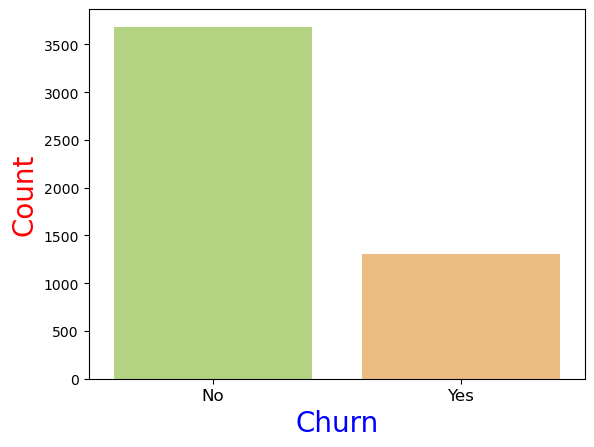

Churn
0    3686
1    1308
Name: count, dtype: int64

In [47]:
sns.countplot(x= "Churn", data= df, palette= "RdYlGn_r")

plt.xticks(fontsize = 12)
plt.xlabel("Churn", fontsize = 20, c= "b")
plt.ylabel("Count", fontsize = 20, c= "r")

plt.show()

df_new["Churn"].value_counts()


Here we can see Data is Imbalance
Implement Random Over Sampler for Balancing data


In [48]:
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler(random_state= 42)
X_res, y_res = os.fit_resample(X,y)
X_res.shape, y_res.shape
from collections import Counter
print('Original Dataset shape{}'.format(Counter(y)))
print("Resampled datset shape{}".format(Counter(y_res)))


Original Dataset shapeCounter({0: 3686, 1: 1308})
Resampled datset shapeCounter({0: 3686, 1: 3686})


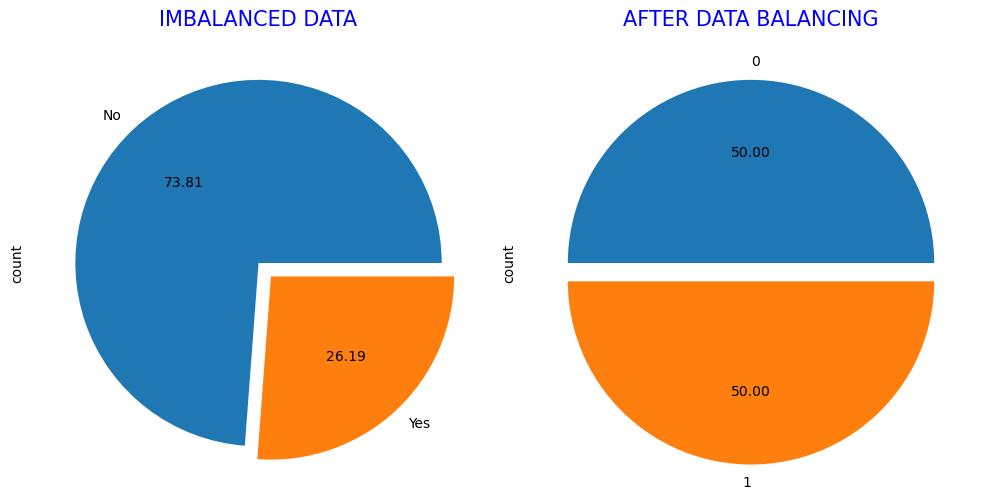

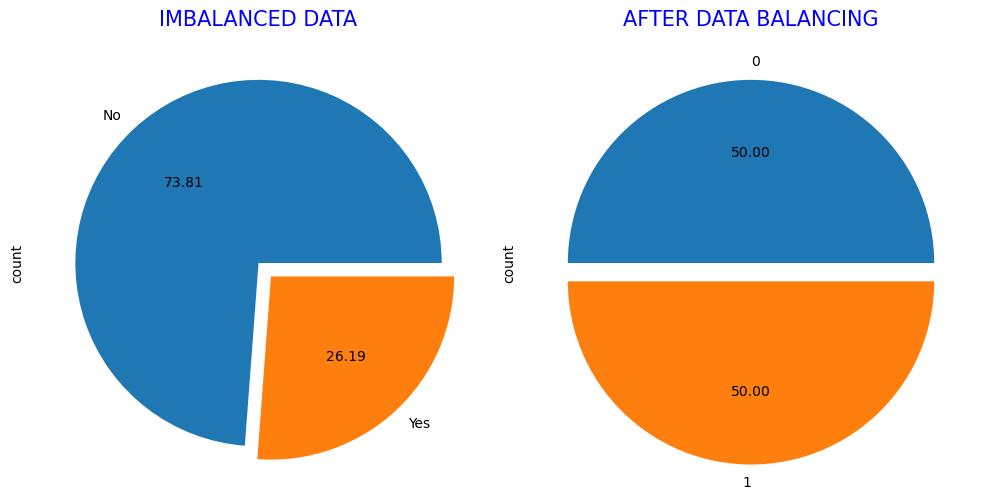

In [58]:
plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
plt.title("IMBALANCED DATA", fontsize = 15, c= "b")
df["Churn"].value_counts().plot.pie(autopct="%.2f", explode=(0,0.1))

plt.subplot(1,2,2)
plt.title("AFTER DATA BALANCING", fontsize = 15, c= "b")
y_res.value_counts().plot.pie(autopct="%.2f", explode=(0,0.1))

plt.tight_layout()

In [61]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_res, y_res,test_size=0.3,random_state=1)


In [63]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


lda=LinearDiscriminantAnalysis()
lda.fit(Xr_train,yr_train )
yr_predict=lda.predict(Xr_test)
print(classification_report(yr_test,yr_predict))



              precision    recall  f1-score   support

           0       0.77      0.72      0.74      1068
           1       0.75      0.80      0.77      1144

    accuracy                           0.76      2212
   macro avg       0.76      0.76      0.76      2212
weighted avg       0.76      0.76      0.76      2212



In [64]:
print("Confusion Matrix: ")
print(confusion_matrix(yr_test,yr_predict))
print("\n")
print("Accuracy Score: ", accuracy_score(yr_test,yr_predict)*100)


Confusion Matrix: 
[[764 304]
 [230 914]]


Accuracy Score:  75.85895117540687


LogisticRegression

In [65]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

lr.fit(Xr_train,yr_train )
yr_predict=lr.predict(Xr_test)
print(classification_report(yr_test,yr_predict))



              precision    recall  f1-score   support

           0       0.75      0.75      0.75      1068
           1       0.77      0.77      0.77      1144

    accuracy                           0.76      2212
   macro avg       0.76      0.76      0.76      2212
weighted avg       0.76      0.76      0.76      2212



In [66]:
print("Confusion Matrix: ")
print(confusion_matrix(yr_test,yr_predict))
print("\n")
print("Accuracy Score: ", accuracy_score(yr_test,yr_predict)*100)


Confusion Matrix: 
[[803 265]
 [263 881]]


Accuracy Score:  76.13019891500905
